<a href="https://colab.research.google.com/github/descruceria777/Se-alesySistemas/blob/main/parcial1SYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

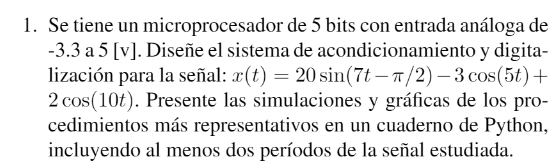

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [ ]:
def my_ceropen(x,ymin = -3.3, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = 25
  xmin = -25 # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  b = ymin - m*xmin
  yv = m*x + b
  return yv

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]


In [ ]:
A1 = 20 # amplitud
A2 = -3
A3 = 2

T_1 = (2/7)*np.pi # Cos 1
T_2 = (2/5)*np.pi # Cos 2
T_3 = (2/10)*np.pi

w1=7
w2=5
w3=10

f1=1/T_1
f2=1/T_2
f3=1/T_3

ti = 0 #tiempo inicial
tf = 4*T_2 #tiempo final
Fs = 36 # Hz
Ts = 1/Fs
tv = np.arange(ti,tf,Ts) #vector de datos en tiempo #discretizar
y = A1*np.sin(w1*tv-np.pi/2)+ A2*np.cos(w2*tv)+ A3*np.cos(w3*tv) #vector de datos en amplitud

#cero y pendiente
ymin = -3.3
ymax = 5
nbits = 5
plt.plot(y,label='y(t)') #continua

In [ ]:
ycs = my_ceropen(y, ymin,ymax)#cero y pendiente
ve = np.linspace(ymin,ymax,2**nbits)

#Acercar al cajon más cercano
for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

#Anchar los cajones a lo largo de tv
for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))#estados de cuantización

plt.stem(tv,yq , linefmt="green", markerfmt="go", basefmt="", label="Señal Discretizada")
plt.plot(tv,ycs,label='ycp(t)') #discreta cero y pendiente
plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2) #cuantizada + discreta = digital
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()
print("Señal discretizada")

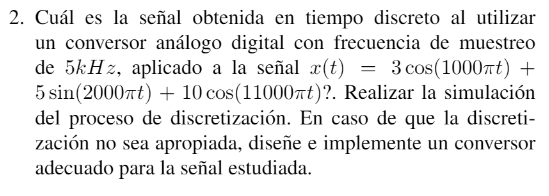

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros de la señal
f1 = 500   # Hz
f2 = 1000  # Hz
f3 = 5500  # Hz
fs_high = 100000  # Frecuencia de muestreo alta para simular señal "continua"
t_high = np.arange(0, 0.01, 1/fs_high)  # 0.01 segundos (para mejor visualización)

# Generar la señal original
x_high = (3 * np.cos(2 * np.pi * f1 * t_high) +
          5 * np.sin(2 * np.pi * f2 * t_high) +
          10 * np.cos(2 * np.pi * f3 * t_high))

# Diseñar filtro antialiasing (Butterworth)
nyquist = 0.5 * fs_high
cutoff = 2500  # Frecuencia de corte
order = 6
normal_cutoff = cutoff / nyquist
b, a = signal.butter(order, normal_cutoff, btype='low')

# Aplicar filtro a la señal "continua"
x_filtered = signal.filtfilt(b, a, x_high)

# Muestrear a 5 kHz después del filtro
fs_low = 5000  # 5 kHz
factor = int(fs_high / fs_low)
x_filtered_low = x_filtered[::factor]
t_low = t_high[::factor]

# Calcular FFTs
fft_high = np.fft.rfft(x_high)
freqs_high = np.fft.rfftfreq(len(x_high), 1/fs_high)
fft_filtered = np.fft.rfft(x_filtered_low)
freqs_low = np.fft.rfftfreq(len(x_filtered_low), 1/fs_low)

# Graficar en tiempo y frecuencia
plt.figure(figsize=(12, 10))

# Señal original en tiempo
plt.subplot(3, 2, 1)
plt.plot(t_high, x_high, label='Original')
plt.title('Señal original (Dominio del tiempo)')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005)  # Primeros 5 ms

# Señal original en frecuencia
plt.subplot(3, 2, 2)
plt.plot(freqs_high, np.abs(fft_high))
plt.title('Espectro original')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 6000)

# Señal filtrada en tiempo
plt.subplot(3, 2, 3)
plt.plot(t_high, x_filtered, 'orange', label='Filtrada')
plt.title('Señal después del filtro antialiasing')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005)

# Señal filtrada en frecuencia
plt.subplot(3, 2, 4)
plt.plot(freqs_high, np.abs(np.fft.rfft(x_filtered)), color='orange')
plt.title('Espectro después del filtro')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 6000)

# Señal discretizada en tiempo
plt.subplot(3, 2, 5)
plt.stem(t_low, x_filtered_low, linefmt='C3-', markerfmt='C3o', basefmt='C3-')
plt.title('Señal discretizada (5 kHz)')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005)

# Señal discretizada en frecuencia
plt.subplot(3, 2, 6)
plt.plot(freqs_low, np.abs(fft_filtered), color='C3')
plt.title('Espectro discretizado')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 2500)

plt.tight_layout()
plt.show()

# Valores de las muestras discretas (primeras 10 muestras)
print("\nPrimeras 10 muestras de la señal discretizada:")
print(np.round(x_filtered_low[:10], 4))
# Explicación
print("Conclusión:")
print("- La frecuencia de muestreo de 5 kHz no es adecuada para la componente de 5500 Hz (aparece aliasing a 500 Hz).")
print("- Se implementó un filtro antialiasing de 2500 Hz para eliminar frecuencias altas.")
print("- La señal discretizada correctamente contiene solo las componentes de 500 Hz y 1000 Hz.")

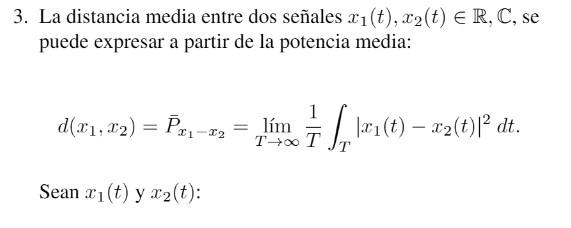


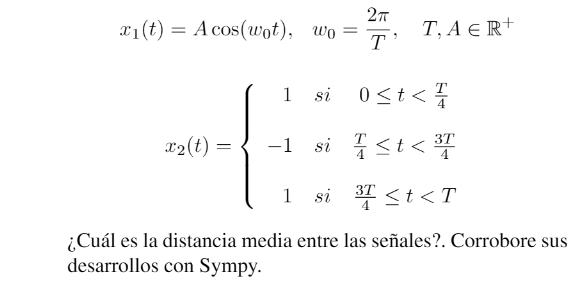

In [ ]:
import sympy as sp  # Importamos SymPy para trabajar con álgebra simbólica

# ----------------------------------------------------
# 1. Definición de variables simbólicas
# ----------------------------------------------------
A, t, T = sp.symbols('A t T', real=True, positive=True)  # A: Amplitud, t: tiempo, T: periodo
w0 = 2 * sp.pi / T  # Frecuencia angular fundamental (omega_0 = 2π / T)

# ----------------------------------------------------
# 2. Definición de las señales periódicas
# ----------------------------------------------------

# Señal x1: señal cosenoidal de frecuencia fundamental w0
x1 = A*sp.cos(w0 * t)

# Señal x2: señal por tramos tipo onda cuadrada, definida en un periodo [0, T)
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),             # Primer cuarto del periodo: valor 1
    (-1, (t >= T/4) & (t < 3*T/4)),        # Mitad central del periodo: valor -1
    (1, (t >= 3*T/4) & (t < T))            # Último cuarto del periodo: valor 1
)

# ----------------------------------------------------
# 3. Diferencia cuadrática entre las señales
# ----------------------------------------------------
# Definimos la función a integrar: el error cuadrático (x1 - x2)^2
f = (x1 - x2)**2

# ----------------------------------------------------
# 4. Cálculo de la integral por tramos
# ----------------------------------------------------
# Se integran los tres tramos de la función definida por partes
integral = (
    sp.integrate(f, (t, 0, T/4)) +           # Primer tramo
    sp.integrate(f, (t, T/4, 3*T/4)) +       # Segundo tramo
    sp.integrate(f, (t, 3*T/4, T))           # Tercer tramo
)

# ----------------------------------------------------
# 5. Cálculo de la distancia media cuadrática
# ----------------------------------------------------
# Promedio sobre el periodo
distancia_media = integral / T

# ----------------------------------------------------
# 6. Simplificación del resultado final
# ----------------------------------------------------
distancia_media_simplificada = sp.simplify(distancia_media)

# ----------------------------------------------------
# 7. Mostrar resultado final
# ----------------------------------------------------
print("Distancia media cuadrática entre x1(t) y x2(t):")
display(distancia_media_simplificada)

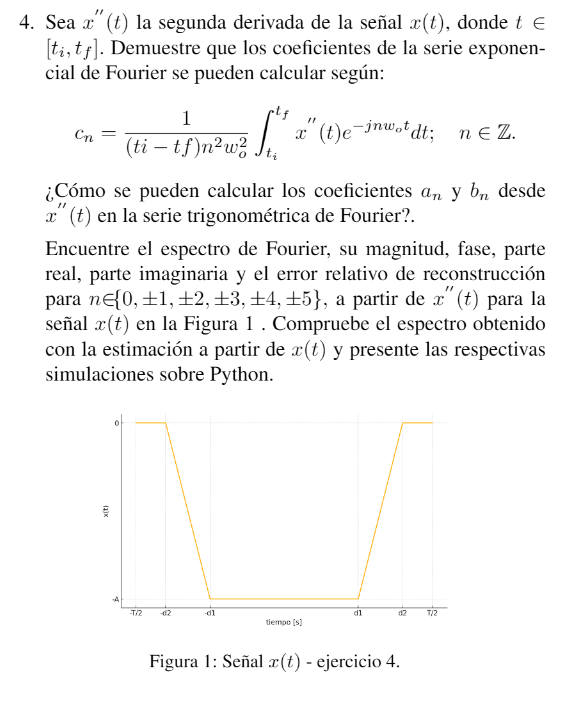

In [ ]:
from ipywidgets import interact,IntSlider
A=1
d2=2
d1=1
#mostrar la señal
T = 2*d2 # segundos de gráfica
Fo = 1/T
Fs = 1000*Fo # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas
def funcion_trapecio(x, a, b, c, d):
    """
    Genera una función en forma de trapecio.

    Parámetros:
    - x: Un array de valores en el eje x.
    - a: Inicio de la pendiente ascendente.
    - b: Inicio de la meseta (valores altos constantes).
    - c: Fin de la meseta (valores altos constantes).
    - d: Fin de la pendiente descendente.

    Retorna:
    - Un array con los valores de la función trapezoidal en cada punto x.
    """
    return np.maximum(0, np.minimum((x - a) / (b - a), np.minimum(1, (d - x) / (d - c))))

# Ejemplo de uso
x = funcion_trapecio(tv, -d2, -d1, d1, d2)



#graficar señal original
plt.plot(tv,x,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

In [ ]:
N = 5 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),np.complex128)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,np.complex128)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = (-2*(np.cos(nv*np.pi)-np.cos(nv*np.pi*0.5)))/(np.pi**2*nv**2)
Cn[N] = 3/4 #Nivel DC

In [ ]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [ ]:
Px = 2/3 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))